# sklearn.ensemble.RandomForestRegressor
- A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib22']

# Validation curves

# n_estimators
- int, default=100
- The number of trees in the forest.

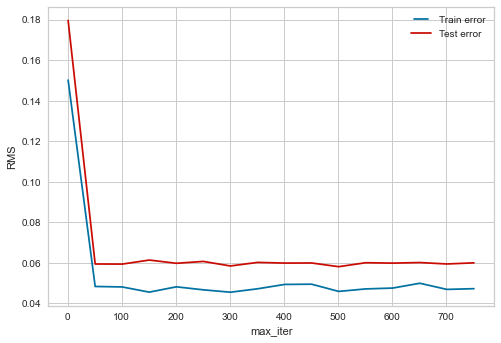

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates = np.arange(1, 800, 50)
train_results = []
test_results = []
for eta in learning_rates:
    mod = RandomForestRegressor(n_estimators=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_iter')
plt.show()

# Max_depth
- int, default=None
- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

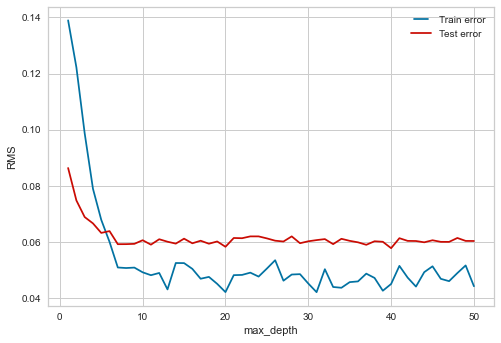

In [5]:
learning_rates = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    mod = RandomForestRegressor(max_depth=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_depth')
plt.show()

# min_samples_split
- int or float, default=2
- The minimum number of samples required to split an internal node:
- If int, then consider min_samples_split as the minimum number.
- If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

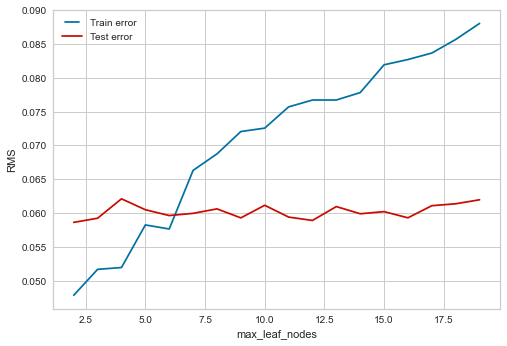

In [6]:
learning_rates = np.arange(2, 20, 1)
train_results = []
test_results = []
for eta in learning_rates:
    mod = RandomForestRegressor(min_samples_split=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_leaf_nodes')
plt.show()

# min_samples_leaf
- int or float, default=1
- The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

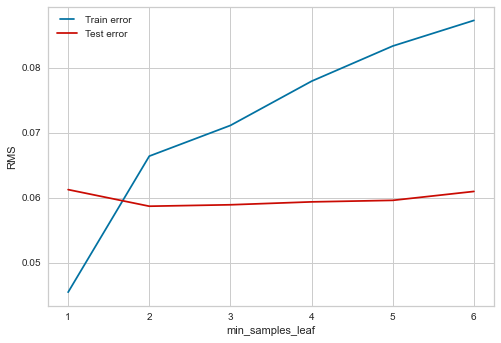

In [7]:
learning_rates = np.arange(1, 7, 1)
train_results = []
test_results = []
for eta in learning_rates:
    mod = RandomForestRegressor(min_samples_leaf=eta)
    model = TransformedTargetRegressor(regressor=mod,func=np.log,inverse_func=np.exp)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_leaf')
plt.show()

---
---

# Random Hyperparameter Grid

In [4]:
Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib14']

In [5]:
n_estimators = [150,200]
max_features = ['auto','sqrt']
max_depth = [19,20]
min_samples_split = [3,4]
min_samples_leaf = [3,4]
criterion=['mse','mae']
warm_start=[True,False]
oob_score=[True,False]
bootstrap = [True,False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'warm_start': warm_start,
               'oob_score': oob_score,
               'bootstrap': bootstrap}

In [6]:
# Use the random grid to search for best hyperparameters
yt=np.log(y)
# First create the base model to tune
rf = RandomForestRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,yt)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.6min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [19, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 4],
                                        'min_samples_split': [3, 4],
                                        'n_estimators': [150, 200],
                                        'oob_score': [True, False],
                                        'warm_start': [True, False]},
                   random_state=42, verbose=2)

In [7]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=200, warm_start=True)

In [22]:
rf_random.best_params_

{'warm_start': True,
 'oob_score': False,
 'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': [1, 2, 3],
 'max_features': 'auto',
 'max_depth': 23,
 'criterion': ['mse', 'mae'],
 'bootstrap': True}

In [8]:
modo=RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=200, warm_start=True)
mod = TransformedTargetRegressor(regressor=modo,func=np.log,inverse_func=np.exp)

In [9]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [23]:
Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib13']
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')


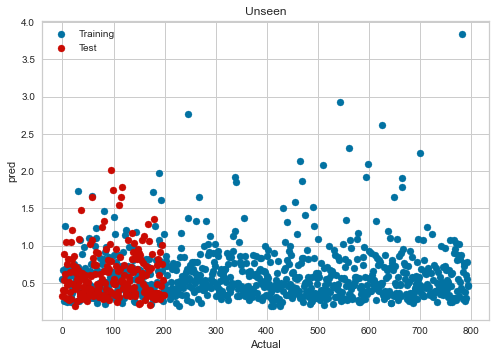

In [22]:
plt.figure()
ind = np.arange(len(y)) 
plt.scatter(ind,y, color="b",label="Training")
ind = np.arange(len(y_Test))
plt.scatter(ind,y_Test, color="r",label="Test")
plt.title("Unseen")
plt.xlabel("Actual")
plt.ylabel("pred")
plt.legend(loc="best")
plt.show()

<Figure size 576x396 with 0 Axes>

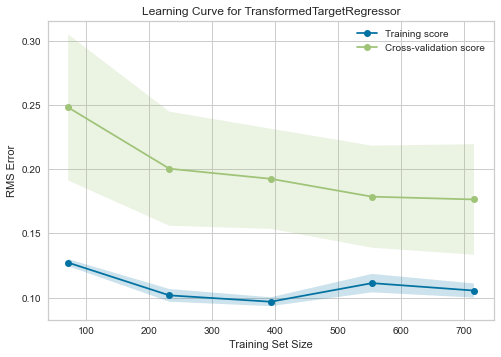

In [24]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [25]:
X = X.to_numpy()
y = y.to_numpy()


In [26]:
y_Test=y_Test.to_numpy()

In [27]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.164951

Root Mean squared error: 0.178908

Root Mean squared error: 0.173911

Root Mean squared error: 0.196404

Root Mean squared error: 0.162963

Root Mean squared error: 0.102972

Root Mean squared error: 0.282422

Root Mean squared error: 0.135499

Root Mean squared error: 0.170769

Root Mean squared error: 0.184748

error COV--->0    1.826037
dtype: float64  error mean --->0    0.113026
Name: mean, dtype: float64  error std --->0    0.20639
Name: std, dtype: float64


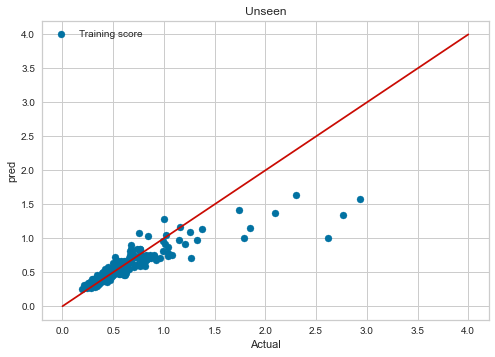

In [28]:
plt.figure()
plt.scatter(y_Test,ytestunk, color="b",label="Training score")
plt.plot([0,4],[0,4],color="r")
plt.title("Unseen")
plt.xlabel("Actual")
plt.ylabel("pred")
plt.legend(loc="best")
plt.show()

# train score

In [29]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.818059
dtype: float64  error mean --->0    0.05597
Name: mean, dtype: float64  error std --->0    0.101756
Name: std, dtype: float64


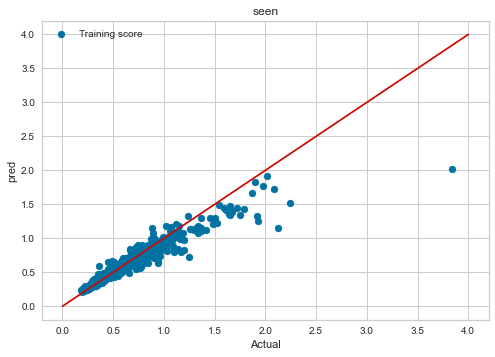

In [30]:
plt.figure()
plt.scatter(y,ytestunk, color="b",label="Training score")
plt.plot([0,4],[0,4],color="r")
plt.title("seen")
plt.xlabel("Actual")
plt.ylabel("pred")
plt.legend(loc="best")
plt.show()

---
---

# Grid search

In [92]:
# n_estimators = [40,50,60]
# max_features = ['auto',0.5,'sqrt']
# max_depth = [15,20,25]
# min_samples_split = [4,5,6]
# min_samples_leaf = [4,5,6]
# criterion=['mse','mae']
# warm_start=[True,False]
# oob_score=[True,False]
# bootstrap = [True,False]

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'criterion': criterion,
#                'warm_start': warm_start,
#                'oob_score': oob_score,
#                'bootstrap': bootstrap}

## Neck
n_estimators = [40,45,50,60]
max_features = ['auto','sqrt']
max_depth = [17,20,23]
min_samples_split = [3,4,5,6]
min_samples_leaf = [3,4,5,6]
criterion=['mse','mae']
warm_start=[True,False]
oob_score=[True,False]
bootstrap = [True,False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'warm_start': warm_start,
               'oob_score': oob_score,
               'bootstrap': bootstrap}

In [93]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Head]

In [94]:
rf = RandomForestRegressor()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)
    

Fitting 10 folds for each of 6144 candidates, totalling 61440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'], 'max_depth': [17, 20, 23],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [40, 45, 50, 60],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [96]:
reg.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 40,
 'oob_score': False,
 'warm_start': False}

In [95]:
reg.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=40)

---
---

In [97]:
# mod=GradientBoostingRegressor(subsample=0.5,n_estimators=110,min_samples_split=3,min_samples_leaf=1,max_features='auto',max_depth=25,learning_rate=0.02)#--0.64
# mod=RandomForestRegressor(max_depth=15, min_samples_leaf=4, min_samples_split=6,criterion='mse',bootstrap=True,max_features='auto',warm_start=False,
#                       n_estimators=40, oob_score=True)

#Neck
# mod=RandomForestRegressor(max_depth=17, min_samples_leaf=3, min_samples_split=6,criterion='mse',bootstrap=True,max_features='auto',warm_start=False,
#                       n_estimators=60, oob_score=False)
# Head acc
# mod=RandomForestRegressor(max_depth=23, min_samples_leaf=5, min_samples_split=6,criterion='mse',bootstrap=True,max_features='auto',
#                       n_estimators=50, oob_score=False,warm_start=True)

## HIC
mod=RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=6,criterion='mse',bootstrap=True,max_features='auto',
                      n_estimators=40, oob_score=False,warm_start=False)


In [98]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [99]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
kf=cv

## Learning Curve

<Figure size 576x396 with 0 Axes>

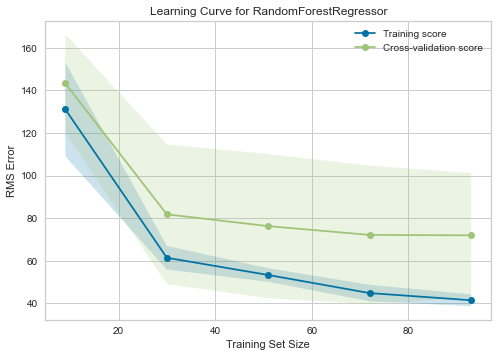

In [100]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

## Unknown data test

In [101]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 126.394503

Root Mean squared error: 47.212368

Root Mean squared error: 45.590544

Root Mean squared error: 111.505779

Root Mean squared error: 67.296816

Root Mean squared error: 47.178898

Root Mean squared error: 34.463615

Root Mean squared error: 67.111639

Root Mean squared error: 95.407829

Root Mean squared error: 72.332214

error COV--->0    0.800205
dtype: float64  error mean --->0    63.184531
Name: mean, dtype: float64  error std --->0    50.560567
Name: std, dtype: float64


# train score

In [102]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.128291
dtype: float64  error mean --->0    32.654424
Name: mean, dtype: float64  error std --->0    36.843684
Name: std, dtype: float64
